In [88]:
import numpy as np
import pandas as pd

In [89]:
df = pd.read_csv('Data/raw.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [90]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [91]:
df.duplicated().sum()

np.int64(0)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    int64  
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 67.1+ KB


In [93]:
df.drop(columns=['Name','Ticket',],inplace=True)

In [94]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22,1,0,7.2500,NaN,S
1,2,1,1,female,38,1,0,71.2833,C85,C
2,3,1,3,female,26,0,0,7.9250,NaN,S
3,4,1,1,female,35,1,0,53.1000,C123,S
4,5,0,3,male,35,0,0,8.0500,NaN,S


In [95]:
df.shape

(714, 10)

In [96]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.712885,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.529273,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.250000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [97]:
df['Survived'].value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

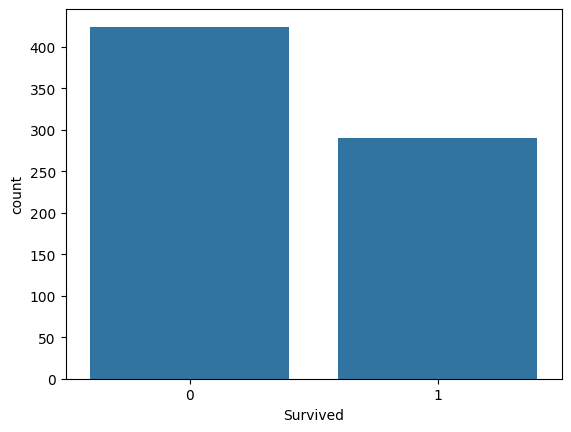

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.Figure(figsize=(0.1,0.4))
sns.countplot(x='Survived',data=df)
plt.show()

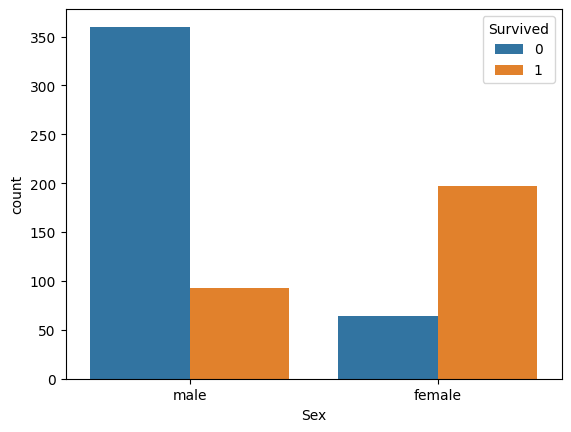

In [99]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()


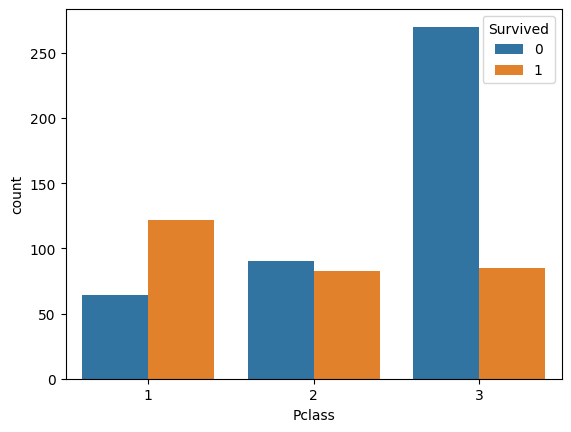

In [100]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()


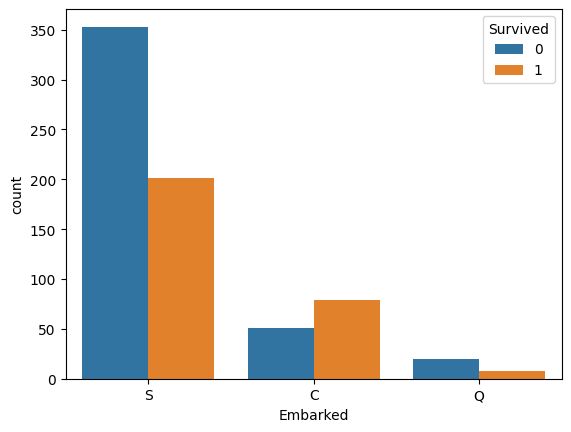

In [101]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.show()


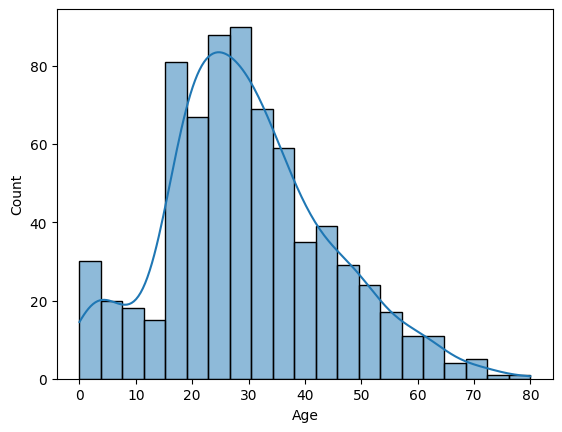

In [102]:
sns.histplot(df['Age'], kde=True)
plt.show()


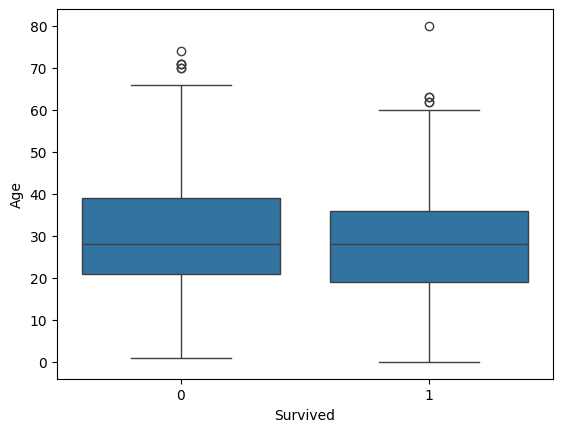

In [103]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()


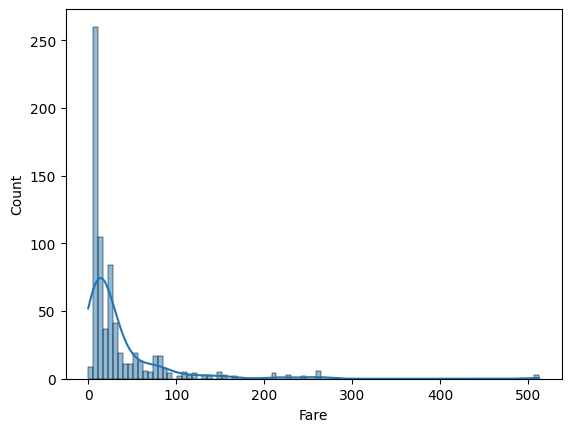

In [104]:
sns.histplot(df['Fare'], kde=True)
plt.show()


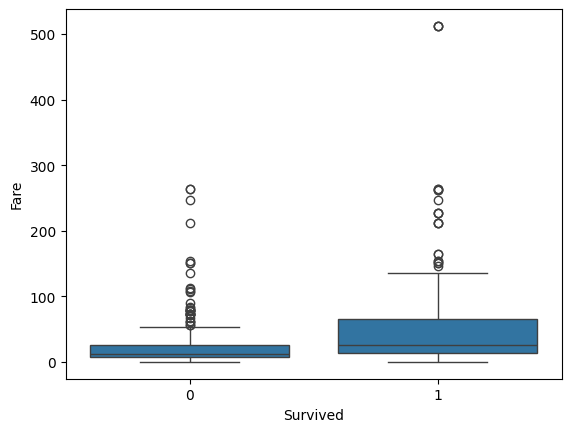

In [105]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.show()


In [106]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


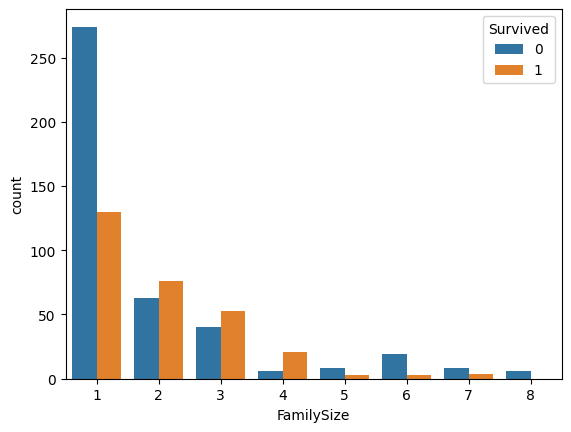

In [107]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.show()


In [108]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
0,1,0,3,male,22,1,0,7.2500,NaN,S,2
1,2,1,1,female,38,1,0,71.2833,C85,C,2
2,3,1,3,female,26,0,0,7.9250,NaN,S,1
3,4,1,1,female,35,1,0,53.1000,C123,S,2
4,5,0,3,male,35,0,0,8.0500,NaN,S,1


In [109]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          529
Embarked         2
FamilySize       0
dtype: int64

In [110]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [111]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


In [112]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,male,22,1,0,7.2500,NaN,S,2,0
1,2,1,1,female,38,1,0,71.2833,C85,C,2,0
2,3,1,3,female,26,0,0,7.9250,NaN,S,1,1
3,4,1,1,female,35,1,0,53.1000,C123,S,2,0
4,5,0,3,male,35,0,0,8.0500,NaN,S,1,1


In [113]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0,12,20,40,60,80],
    labels=['Child','Teen','Adult','MiddleAge','Senior']
)


In [114]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup
0,1,0,3,male,22,1,0,7.2500,NaN,S,2,0,Adult
1,2,1,1,female,38,1,0,71.2833,C85,C,2,0,Adult
2,3,1,3,female,26,0,0,7.9250,NaN,S,1,1,Adult
3,4,1,1,female,35,1,0,53.1000,C123,S,2,0,Adult
4,5,0,3,male,35,0,0,8.0500,NaN,S,1,1,Adult


In [115]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [116]:
df['Fare'] = np.log1p(df['Fare'])


In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [118]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup
0,1,0,3,1,22,2.110213,NaN,S,2,0,Adult
1,2,1,1,0,38,4.280593,C85,C,2,0,Adult
2,3,1,3,0,26,2.188856,NaN,S,1,1,Adult
3,4,1,1,0,35,3.990834,C123,S,2,0,Adult
4,5,0,3,1,35,2.202765,NaN,S,1,1,Adult


In [131]:
X = df.drop(['Survived','PassengerId','Cabin'],axis=1)
y = df.iloc[:,1]

In [132]:
X.shape

(714, 8)

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [134]:
X_train.shape

(571, 8)

In [137]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,AgeGroup
264,3,0,31,3.069215,S,3,0,Adult
56,3,1,26,2.737881,C,2,0,Adult
204,3,1,30,2.839078,S,2,0,Adult
571,3,1,33,2.171907,S,1,1,Adult
527,2,1,25,2.639057,S,1,1,Adult


In [138]:
numerical_columns = ['Pclass','Sex','Age','Fare','FamilySize','IsAlone']
categorical_columns = ['Embarked','AgeGroup']

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])


In [147]:
transformer = ColumnTransformer([
    ('numerical',num_pipeline,numerical_columns),
    ('categorical',cat_pipeline,categorical_columns)
])

In [148]:
from sklearn.linear_model import LogisticRegression
model_pipeline = Pipeline(steps=[
    ('preprocessor',transformer),
    ('model',LogisticRegression())
])

In [149]:
model_pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [150]:
y_pred = model_pipeline.predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7552447552447552
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

